In [1]:
import os
import csv
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import pickle
import matplotlib.pyplot as plt

In [2]:
code_path = os.getcwd()
input_dir = os.path.join(code_path,'radarScenes_v6_Nmin')
print(input_dir)

/home/user/deng/catkin_deng/src/track/DBSCAN_Train/radarScenes_v6_Nmin


In [5]:
def csv_read():
  print("Reading directory:",input_dir)
  files = os.listdir(input_dir)
  files.sort(key=lambda x:x[:11])
  print('Training Sequence:',len(files))
  Vel = []
  TrainX = []
  for filename in files:
    csv_path = os.path.join(input_dir,filename)
    with open(csv_path,newline='') as csv_file:
      rows = csv.reader(csv_file)
      first = True
      for row in rows:
        if first:
          first = False
          continue
        if str(row).find('nan') != -1 or str(row).find('inf') != -1:
          continue
        Vel.append(float(row[13]))
        input_row = []
        input_row.append(float(row[4])/int(row[11])) # vel slot 0
        input_row.append(float(row[5])/int(row[11])) # vel slot 1
        input_row.append(float(row[6])/int(row[11])) # vel slot 2
        input_row.append(float(row[7])/int(row[11])) # vel slot 3
        input_row.append(float(row[8])/int(row[11])) # vel slot 4
        input_row.append(float(row[9])/int(row[11])) # vel slot 5
        input_row.append(int(row[11])) # current scan num

        TrainX.append(input_row)
  VelMatrix = np.asarray(Vel)
  VelMatrix.reshape(len(Vel),1)
  print('Target:',VelMatrix[0])
  print('Input:',TrainX[0])
  TrainMatrix = np.asarray(TrainX)
  X_train, X_test, Y_train, Y_test = model_selection.train_test_split(np.array(TrainMatrix), np.array(VelMatrix), test_size=0.2)
  print('Training Element: vel slot 0~5, current scan num; Training Target: Vel threshold')
  return X_train, X_test, Y_train, Y_test, TrainMatrix, VelMatrix

In [6]:
X_train, X_test, Y_train, Y_test, X_total, Y_total = csv_read()

Reading directory: /home/user/deng/catkin_deng/src/track/DBSCAN_Train/radarScenes_v6_Nmin
Training Sequence: 120
Target: 7.385
Input: [0.984149855907781, 0.012968299711815562, 0.002881844380403458, 0.0, 0.0, 0.0, 694]
Training Element: vel slot 0~5, current scan num; Training Target: Vel threshold


In [7]:
def save_model(model,name):
    out_path = os.path.join(code_path,name+'.sav')
    pickle.dump(model,open(out_path,'wb'))

In [8]:
def evaluate_model(model,X_test,Y_test):
    predict_y_test = model.predict(X_test)
    print('Test r-score: ',metrics.r2_score(Y_test,predict_y_test))
    print('Test mean: ',metrics.mean_squared_error(Y_test,predict_y_test))
    # print('Test Score: ',model.score(X_test,Y_test))
    print(Y_test)
    print(predict_y_test)

In [9]:
def load_model(name):
    load_path = os.path.join(code_path,name+'.sav')
    return pickle.load(open(load_path, 'rb'))

In [11]:
training_model_name = 'vel_MLP_model_logistic_v1'

In [14]:
print('Training Net '+training_model_name+'!')
model = MLPRegressor(hidden_layer_sizes=200, max_iter=300, activation='logistic')
model.fit(X_total,Y_total)
save_model(model, training_model_name)

Training Net vel_MLP_model_logistic_v1!


{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test r-score:  0.49270778410122573
Test mean:  8.769936962901017
[0.441 3.862 0.413 ... 4.933 8.859 0.309]
[-0.64716681  3.03606     3.16002487 ...  0.33019632  8.25385281
 -0.68867567]


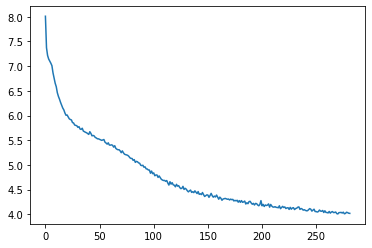

In [15]:
print(model.get_params())
evaluate_model(model,X_test,Y_test)
plt.plot(model.loss_curve_)

In [29]:
for i in range(100):
    model.partial_fit(X_train, Y_train)
    # print('End training iter',i)
    save_model(model,training_model_name)

{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test r-score:  0.5832092517803047
Test mean:  7.205370936218834
[0.441 3.862 0.413 ... 4.933 8.859 0.309]
[0.4629728  4.12667785 3.95696612 ... 1.31991797 8.89740624 0.3701098 ]


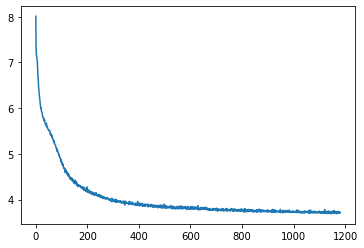

In [30]:
print(model.get_params())
evaluate_model(model,X_test,Y_test)
plt.plot(model.loss_curve_)

In [31]:
intercepts = np.array(model.intercepts_)
print(intercepts.shape)
print(repr(intercepts[0]))
print(repr(intercepts[1]))

(2,)
array([ 6.95205324,  7.11154417,  7.24475967, -4.97743674,  2.15582262,
       -5.98503626,  0.78934585,  3.47020606,  1.66451403,  0.61925488,
        5.55003489,  7.16366942,  0.95243774,  2.55048263,  0.8990507 ,
        0.2199026 ,  7.43780867,  3.72407715,  4.89846393,  8.82782734,
        3.51879518,  2.09823068,  5.06726762,  1.35746034, -4.88107161,
       -5.2339244 ,  2.9709076 ,  5.03356054,  2.75599625,  2.93765034,
        6.7448406 ,  2.62144674,  4.1781247 ,  3.9665511 ,  6.94308791,
       -5.80846318,  8.07185376, -0.32780182, -4.17857984, 10.58489202,
        6.92377261,  2.8997395 ,  3.41595186,  4.76757933,  7.05026927,
        4.26730181, -0.47703796,  6.91747998,  3.63013361,  7.2416376 ,
        3.4508615 , -0.85482185,  4.03182067, -1.68060956,  3.60733394,
        3.01119731, -0.57169684,  7.52895433, -1.44495359,  2.85293907,
        3.74148176, -5.95176981,  6.55547694,  1.05634501,  2.52603675,
        9.99175923,  6.30721577,  1.42475465, -0.32599202, 

In [32]:
coef = np.array(model.coefs_)
print(coef[0].shape)
print(coef[1].shape)
for i in range(7):
    print("coef 0-",i)
    print(repr(coef[0][i]))
reshape_coef_1 = coef[1].transpose()
for i in range(1):
    print("coef 1-",i)
    print(repr(reshape_coef_1[i]))


(7, 200)
(200, 1)
coef 0- 0
array([ 1.40526740e-04,  6.40829798e-04,  5.45176339e-04, -1.41000470e-04,
       -5.57905912e-05, -1.69590052e-04,  3.69495456e+00,  1.21088844e-02,
        1.83418153e+00,  1.21162370e-03,  1.95117006e-01,  1.12711592e+00,
        3.62941612e+00,  3.19919381e-04, -5.78796594e-04, -1.37850871e-03,
        1.64448983e-04,  5.68677126e+00,  1.08041852e-01,  1.37391350e-04,
        6.76498623e-03,  3.00281428e-03,  9.18007010e-04,  1.67328894e-03,
       -1.36609731e-04, -1.27521676e-04,  4.73596002e-03,  1.37276600e-01,
        1.66085816e-02,  9.04899993e-03,  1.87424969e-04,  4.13939832e-03,
        6.26569123e-02,  3.02374428e-02,  1.32638951e-04, -1.47925287e-04,
        6.27915286e+00,  4.83853782e-05, -7.98311461e-05,  1.53042696e-04,
        1.41136457e-04,  8.35053700e-03,  1.01649998e-02,  9.35597434e-02,
        1.36460029e-04,  5.18182324e-02,  5.37823163e-05,  1.35553765e-04,
        1.28235994e-02,  1.21250338e-04,  1.17021253e-02,  1.56948742e-0

In [10]:
from sklearn.linear_model import LinearRegression
training_model_name_2 = 'vel_Linear_model_v1'
model2 = LinearRegression().fit(X_total, Y_total)
save_model(model2,training_model_name_2)
print(model2.get_params())
evaluate_model(model2,X_test,Y_test)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Test r-score:  0.26711856994107286
Test mean:  12.669865102326069
[0.441 3.862 0.413 ... 4.933 8.859 0.309]
[1.29595527 2.28220717 2.41801496 ... 1.29154762 8.29178515 1.42688661]
